In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='07afe8c4-7346-47a9-b182-3082c6d77a68', project_access_token='p-296809701d0f7d74306c7b1850a94c1c10483b22')
pc = project.project_context


# Battle of the Neighborhoods- Food Insecurity with Covid-19

## Introduction/Business Problem:


With many being unemployed due to Covid-19, hunger among US children is growing. Food insecurity has also grown from students not receiving a meal at schools are closed or operating virtually due to Covid-19.In April 41% of mothers with children under the age of 13 reported recent food insecurity, which is the highest level since 2001. In addition, the non-profit organization, Feeding America, projects 18 million children could be food insecure in 2020. While many school districts are operating in a grab-n-go fashion, many students are unable to make it to these sites. For example, many school districts operate summer feeding programs. However, in 2018 only 14.1% of kids who received a free or reduced-price meals during the school year got a meal over the summer. Barriers for students getting grab-n-go meals include transportation barriers, families not knowing meals are available, and sites not being open when families are able to pick up meals.
This project will look at where grab-n-go sites should be placed within the Lewisville ISD school district. Selecting the right grab-n-go sites is crucial in helping students overcome the barriers preventing them from getting the food they need. 

## Data


This project will use foursquare API data to get the latitude and longitude coordinates for each of the 66 schools in the school district. In addition, the project will use data showing how many students qualify for free and reduced lunches and the enrollment data for each of the 66 schools.
The datasets will be analyzed to determine which of the 66 sites would be the most useful to serve grab and go meals from based on geography and need of the local community.


In [14]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_65e164cdc3734a849b4963e9a15695f3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q6zEkXkixXv1oNBt9wCfMS4xOozyjOuw35eZQQMSQVkb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_65e164cdc3734a849b4963e9a15695f3.get_object(Bucket='capstoneproject-donotdelete-pr-tfc3arfibcxxd2',Key='FreeReducedData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,School,Enrollment,Free,Free %,Reduced,Reduced %,Free & Reduced,F&R %,Paid,Paid %
0,Bluebonnet,504,31,6%,5,1%,36,7%,468,93%
1,Bridlewood,483,26,5%,1,0%,27,6%,456,94%
2,Camey,548,275,50%,36,7%,311,57%,237,43%
3,Castle_Hills,704,36,5%,4,1%,40,6%,664,94%
4,Central,549,437,80%,43,8%,480,87%,69,13%


## Methodology

To chose the best sites, the data was looked at in a variety of ways. The first way the data was analyzed was to look at how many free students each school had in their enrollment.

In [15]:

body = client_65e164cdc3734a849b4963e9a15695f3.get_object(Bucket='capstoneproject-donotdelete-pr-tfc3arfibcxxd2',Key='schools ranked by free students.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head(20)


,School,Free,Free %,Reduced,Reduced %,Free & Reduced,F&R %,Paid,Paid %,Feeder
0,Lewisville_High,1203,55%,207,9%,1410,65%,770,35%,Lewisville
1,LHS_Harmon,813,64%,100,8%,913,72%,350,28%,Lewisville
2,DeLay_MS,812,81%,67,7%,879,87%,129,13%,Lewisville
3,The_Colony_High,760,36%,174,8%,934,45%,1162,55%,The Colony
4,LHS_Killough,636,62%,85,8%,721,71%,300,29%,Lewisville
5,Lakeland,600,84%,38,5%,638,89%,77,11%,Lewisville
6,Hebron_High,557,20%,101,4%,658,24%,2142,77%,Hebron
7,Durham_MS,482,64%,65,9%,547,72%,209,28%,Lewisville
8,Vickery,470,70%,52,8%,522,77%,154,23%,Flower Mound
9,Mill_Street_ES,451,81%,26,5%,477,85%,81,15%,Lewisville



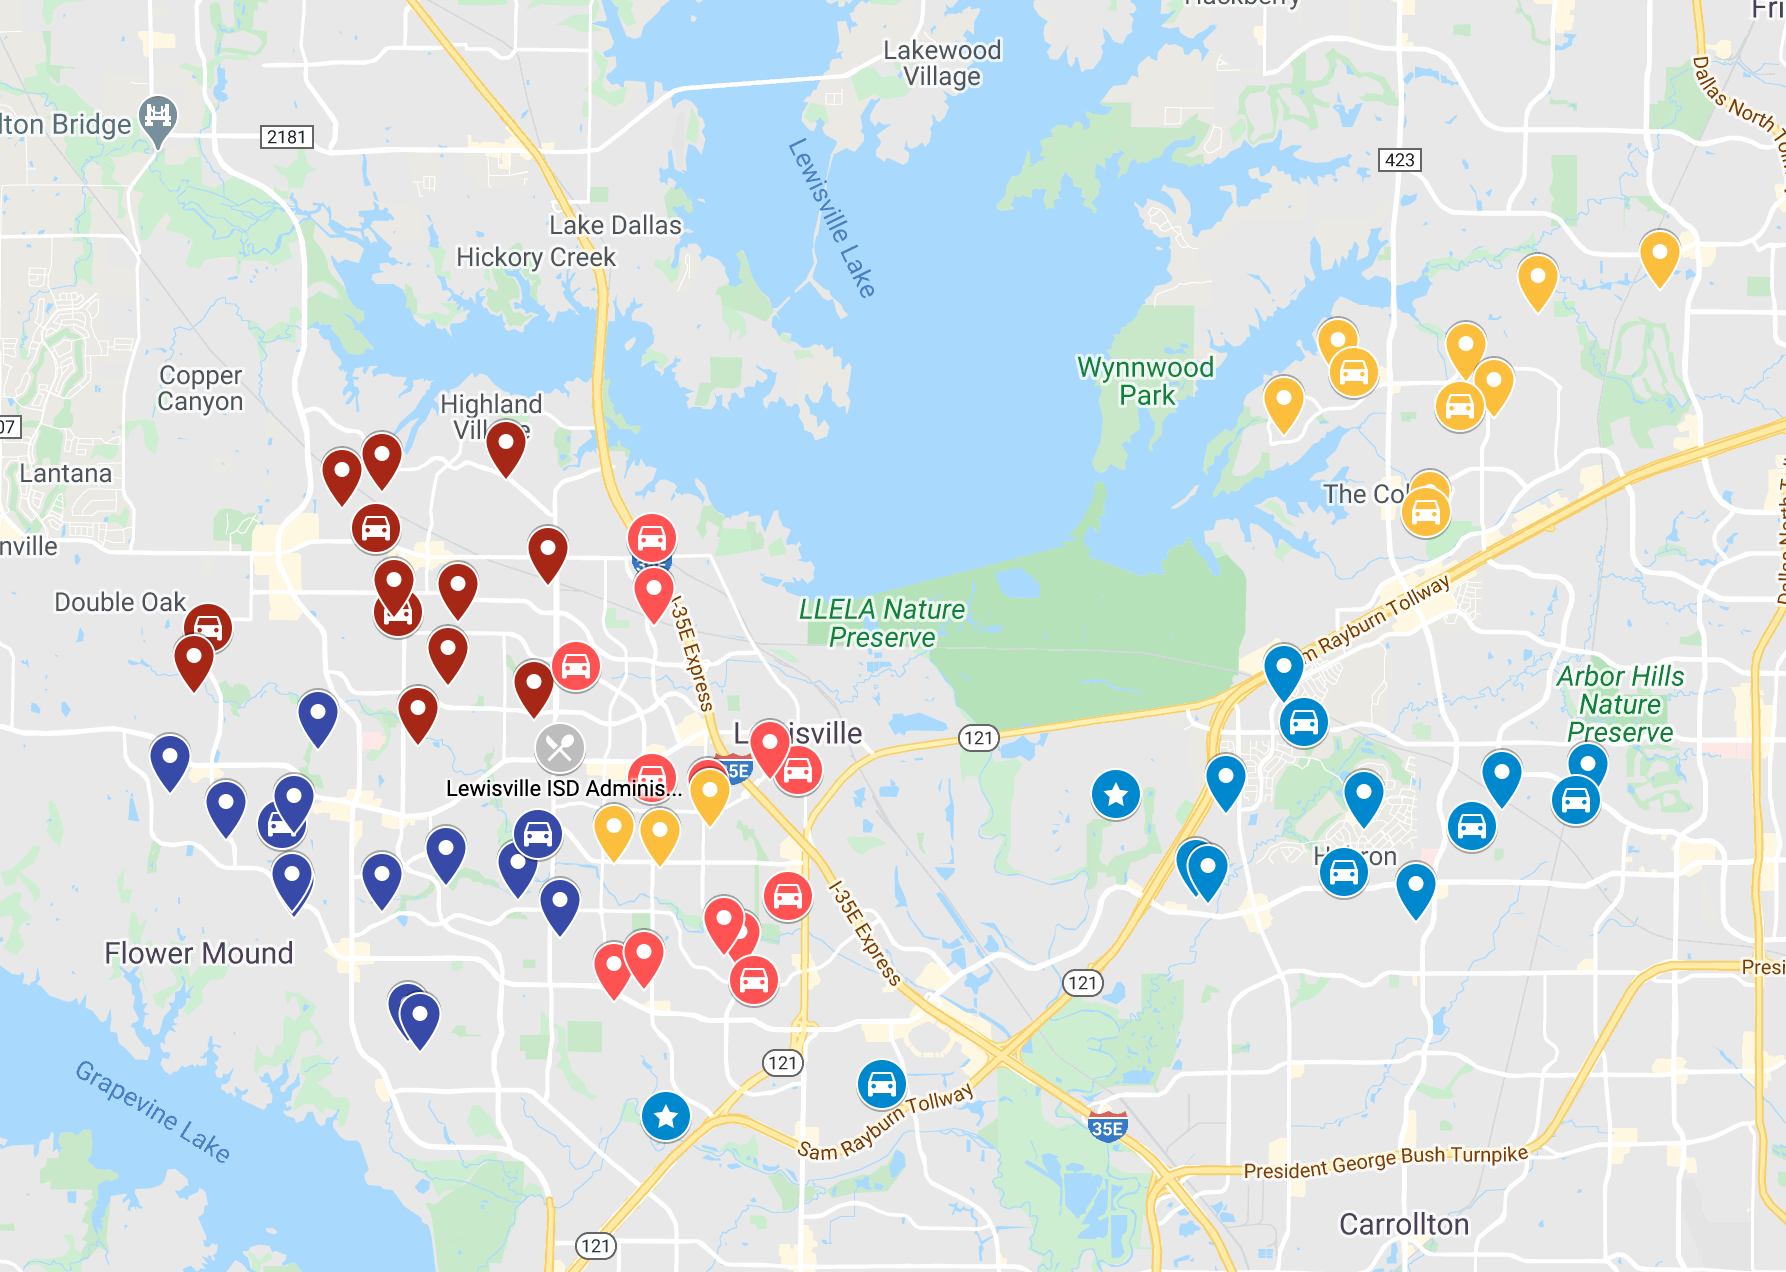


The data shows that the Lewisville high school feeder pattern has the most free students. Since schools in the Lewisville High School feeder pattern are close together, it would make sense to select schools outside this feeder pattern, as well, even if these schools do not have the most free and reduced students. Machine learning could have been used to cluster the schools, but this would have not been beneficial since similar schools would more than likely be geographically close to each other, which is something we are trying to avoid in selecting the sites.

## Results

The best grab and go meal sites include Lewisville Harmon High School. This site has a free student percentage of 64% and 813 free students. Lewisville HS was not selected due to its close proximity to Lewisville Harmon. Other schools selected in the Lewisville Feeder pattern include Mill Street Elementary School and Lakeland Elementary School. 

Other good grab and go meal sites include Hedrick Middle School and Vickery Elementary School due to their high free student enrollment and geographic separation from the other selected sites.

## Discussion



When selecting sites, stakeholders must look at how many sites the school is looking to operate and would need to look at how accessible each site is to its students. For example, parents way be working and students may have to walk to the sites. The number of sites selected will play a big role in determing the sites. If few sites are selected, it would be advantageous to select sites that are geographically separated compared to just selecting the sites with the highest need. Also, it is important to evaluate other resources that are available outside of the school district's feeding program to prevent two feeding programs from targeting the same students.

## Conclusion

Based on the data analysis, I would select Lewisville Harmon HS, Mill Street Elementary School, Lakeland Elementary School, Hedrick Middle School, and Vickery Elementary School. 
However, if the school distirct wanted to operate more sites: Peter's Colony, Central Elementary and Lewisville Elementary would be other great options.